# Analyzing IMDB Movies and Box Office Trends - Unit 4 Capstone Project

# 1. Introduction
For this project, I will use a dataset from Kaggle regarding the top 1000 movies from 2006-2016 according to IMDB (Internet Movie Database), which users voted the most for each movie from 2006-2016. The variables are genre, year, runtime, revenue (millions), metascore, and audience rating score. IMDB (Internet Movie Database) is a company that provides information about the movie. The significance of this project emphasizes the data relating to movies. The dataset helps recommend moviegoers into a certain movie. I am doing this project because I want to find out how the variables relate to each other for each movie especially the audience ratings. This way, we can find out what factors are related with the ratings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('moviedata-IMDB.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


# 2. Data Set Description
Genre – What type of movie is it?

Year – The year the movie was produced (anywhere from 2006-2016)

Runtime – The duration of the movie

Revenue – How much did the movie earn domestically?

Metascore – The average score of professional critics from publications from 0 to 100.

Rating – How the audiences rated the movie on a scale from 0 to 10

I found some missing data in the variables of "Revenue" and "Metascore" because these movies were not available in theaters. Also, some of those movies did not have a Metascore because that movie had a low number of reviews. However, I ignored the missing data and moved on with the project because the small missing data did not have a major effect on the dataset.

Because there is more than one genre in many movies, I will split them up and write a code to only show the first genre.


In [2]:
movies["FirstGenre"] = movies["Genre"]
movies.head()

movies["FirstGenre"]= movies["FirstGenre"].apply(lambda x: x.split(",")[0])
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,FirstGenre
0,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Action
1,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,Action
2,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,Action
3,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Action
4,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action


# 3. Exploratory Data Analysis

# 3.1. Here are the correlations between all of the variables below:

In [3]:
movies.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.272570,-0.193347
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.127622,-0.078258
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.269224,0.216068
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.219329,0.642396
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.640738,0.328678
Revenue (Millions),-0.272570,-0.127622,0.269224,0.219329,0.640738,1.000000,0.143371
Metascore,-0.193347,-0.078258,0.216068,0.642396,0.328678,0.143371,1.000000


The rank does not have a value to any of the variables because that variable selected movies randomly from this dataset. However, the strongest correlations that I noticed is the relationship between Metascore and Revenue (Millions). Also, I noticed a positive correlation between Votes and Revenue (Millions).

# 3.2. Do genres correlate well with the box office and the audience ratings on average for each film?

I ask this question because we want to find out if there are some variances between genres and revenues.

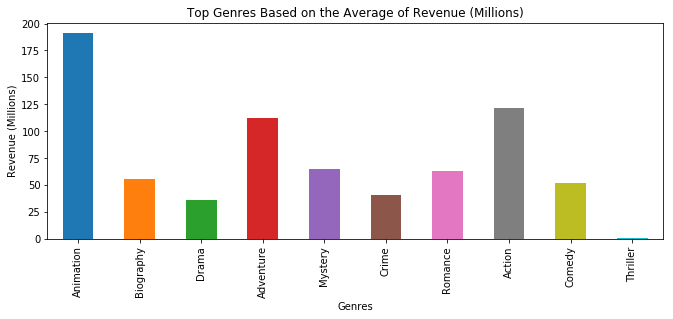

In [6]:
title = movies.groupby('FirstGenre').mean()

title = title.sort_values(by = 'Rating', ascending = False)[0:10]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Genres')
plt.ylabel('Revenue (Millions)')
plt.title('Top Genres Based on the Average of Revenue (Millions)')
plt.subplots_adjust(top=2.00, bottom=1.25, right=1.55)

plt.show()

Animation films correlate well with the box office and their average audience rating. Most animation films do well because they are accessible to a quadrant audience unlike the majority of R-rated critically-acclaimed movies. However, adventure and action movies scored lower on IMDB; yet, they scored higher at the box office. The reason for it is that those movies are from familiar franchises that audiences have seen before. Biography and drama movies have better quality. However, those type of movies deflates its box office. The reason is the nature of the movie and some of those movies may not be accessible to mainstream audiences.

# 3.3. Do audience ratings correlate well with the 10 Top Grossers?

I ask this question because I want to find out if the box office revenue goes higher as audience ratings go higher.

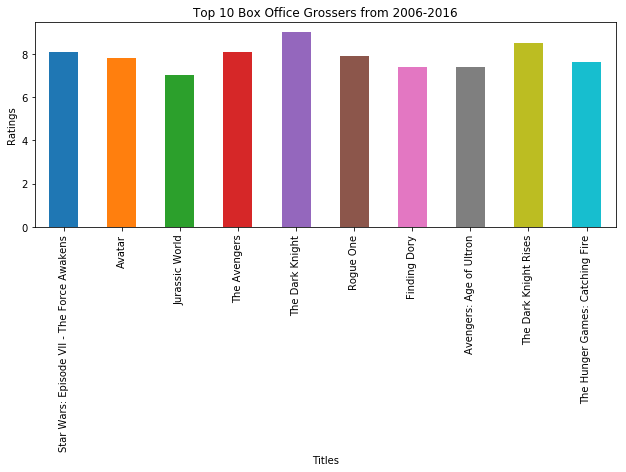

In [7]:
title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Revenue (Millions)', ascending = False)[0:10]

title['Rating'].plot(kind='bar')

plt.xlabel('Titles')
plt.ylabel('Ratings')
plt.title('Top 10 Box Office Grossers from 2006-2016')
plt.subplots_adjust(top=1.88, bottom=1.17, right=1.47)

plt.show()

The IMDB scores are not all high compared to the top 10 movies among 1000 users. Therefore, only one of them (Avatar) is an original. Out of all the top 10 best movies according to IMDB users, only one of them (The Dark Knight) made it to the top 10 for the box office. Back in the 1990s, there were more originals that were in the top 10 in terms of box office grosses. When sequels are made, if the quality is great from its predecessor, moviegoers will pay money to go see it. Now of these days, sequels have a better chance of getting greenlighted by Hollywood than original movies. Jurassic World, Finding Dory, and Avengers: Age of Ultron did not live up to their quality compared to their respective predecessors.

# 3.4. Does the relationship between the audience ratings and box office revenues for each movie correlate well?

I am asking this question because I want to find out if a movie that audiences enjoyed always gets the most revenue for that particular movie.

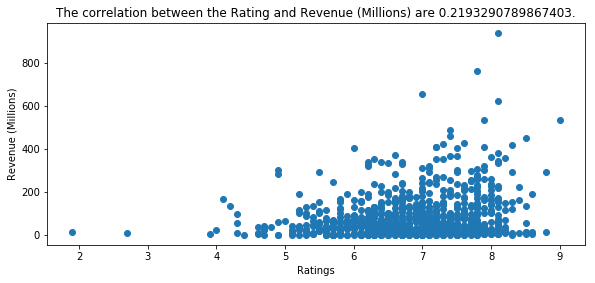

In [8]:
plt.scatter(x=movies['Rating'], y=movies['Revenue (Millions)'])
plt.title("The correlation between the Rating and Revenue (Millions) are " + str(movies.corr().iloc[3,5]) + ".")
plt.xlabel('Ratings')
plt.ylabel('Revenue (Millions)')
plt.subplots_adjust(top=1.88, bottom=1.11, right=1.37)
plt.show()

There is no definite answer. Some critically-acclaimed movies that audiences enjoyed (Fantastic Mr. Fox, Her, Room) make lower money than movies with negative reviews that audiences disliked (Fifty Shades of Grey, Clash of the Titans, 2012). Transformers series stands out as an example. Those movies made more revenue than some movies with fantastic reviews and audience ratings. Also, audiences were familiar with those movies because they came from a familiar adaptation. Overall, there is a mild positive correlation between audience ratings and box office revenues.

# 3.5. Does metascore correlate with audience ratings?

I wrote this question because I want to find out whether the audience ratings are in line with professional critics.

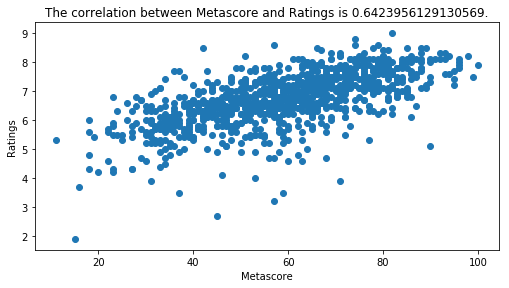

In [9]:
plt.scatter(x=movies['Metascore'], y=movies['Rating'])
plt.title("The correlation between Metascore and Ratings is " + str(movies.corr().iloc[3,-1]) + ".")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.20)
plt.xlabel('Metascore')
plt.ylabel('Ratings')
plt.show()

There is no definite answer for this even though there is a positive correlation between those two variables. However, there are exceptions such as movies with big stars (Chris Pratt from Passengers, most Adam Sandler and Will Smith movies, Gerald Butler from Law Abiding Citizen) do better with audiences than critics while other highly-reviewed movies (Tree of Life, Love of Friendship, Under the Skin) score significantly higher with critics than audiences.

# 3.6. Does the number of IMDB votes correlate with box office well?

I made this question because I want to find out if a high number of IMDB votes are on par with box office revenues.

In [ ]:
plt.scatter(x=movies['Revenue (Millions)'], y=movies['Votes'])
plt.title("The correlation between Revenue (Millions) and Votes is " + str(movies.corr().iloc[5,4]) + ".")
plt.subplots_adjust(top=1.89, bottom=1.06, right=1.32)
plt.xlabel('Revenue (Millions)')
plt.ylabel('Number of Votes')
plt.show()

For most movies, the more people vote for how much they rated the film, the more money it makes at the box office. However, there are exceptions to this rule. The Prestige has over 900,000 votes; yet, it grossed a modest 53 million. It had more votes than Star Wars: The Force Awakens, which was the highest grosser of 2015. The high number of votes for The Prestige implicates that it did much better when it was released on DVD when audiences caught up with the movie. Children's movies including Sing, Hotel Transylvania, Trolls, and Home scored lower in IMDB votes because of that demographic not able to vote for movies. Even with those exceptions, the number of IMDB votes and the box office correlate positively.


# 3.7. Does Metascore correlate with Box Office well?

I made this question because I want to find out if the high score from professional critics indicate a high box office gross.

# Here are two graphs about the top 20 and bottom 20 Metascores from 2006-2016 and their box office grosses below:

In [ ]:
title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Metascore', ascending = False)[0:20]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Titles')
plt.ylabel('Revenue (Millions)')
plt.title('Top 20 Metascores from 2006-2016 with their Box Office Revenue')
plt.subplots_adjust(top=1.88, bottom=0.89, right=1.87)
plt.show()

In [ ]:
title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Metascore', ascending = True)[0:20]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Titles')
plt.ylabel('Revenue (Millions)')
plt.title('Bottom 20 Metascores from 2006-2016 with their Box Office Revenue')
plt.subplots_adjust(top=1.84, bottom=0.88, right=1.87)

plt.show()

There is no definite answer. It depends on these factors: the storyline of the movie, if the movie is a sequel, and if the movie comes from the director of a previous popular movie. Some critically-acclaimed movies that audiences enjoyed (The Hurt Locker, Boyhood, Moonlight) may make lower money than movies with mixed to negative reviews that audiences disliked (Grown Ups 2, Bride Wars, Couples Retreat). The Last Airbender made more revenue than other movies with fantastic reviews and audience ratings because they came from an adaptation (A popular show on Nickelodeon).

# 4. Conclusion and Further Research #
Overall, I have found ratings have the most significant relationship to any variables from the questions I answered. For the majority of movies, the number of votes correlated well with Revenue (Millions) because they vote for the movie after they purchased the ticket and saw the movie in theaters. Additionally, I did not use rank, year, and runtime in this dataset because of those variables lacking a significance in a movie's success. Critics and audiences rating a movie and how many votes and money each movie earned indicates a movie's success.

I plan to find more information on those analytical questions I listed. I hope to forecast models with Python related to box office. Also, I hope to add more attributes such as budget, international gross, studio and gross profit for each of the movies. If I am able to find a dataset for them, I will be able to write more questions for them and relate those attributes to this dataset. A further question I hope to accomplish: Does a big budget correlate well with high-grossing movies?  